# Inaugural Project

Imports and set magics:

In [80]:
import numpy as np
from types import SimpleNamespace
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Illustrate how $H_F / H_M$ changes when varying $\alpha \in {0.25, 0.5, 0.75}$ and $\sigma \in {0.5, 1.0, 1.5}$.**

/Users/poulmartinpetri/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KU - Polit/6. SEM/INTRO. PROG./projects-2023-snj927-vpc398/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))
/Users/poulmartinpetri/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KU - Polit/6. SEM/INTRO. PROG./projects-2023-snj927-vpc398/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))
/Users/poulmartinpetri/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KU - Polit/6. SEM/INTRO. PROG./projects-2023-snj927-vpc398/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-

alpha = 0.25, sigma = 0.50, HF / HM ratio = 0.55
alpha = 0.25, sigma = 1.00, HF / HM ratio = 0.31
alpha = 0.25, sigma = 1.50, HF / HM ratio = 0.21
alpha = 0.50, sigma = 0.50, HF / HM ratio = 1.00
alpha = 0.50, sigma = 1.00, HF / HM ratio = 1.00
alpha = 0.50, sigma = 1.50, HF / HM ratio = 1.00
alpha = 0.75, sigma = 0.50, HF / HM ratio = 1.83
alpha = 0.75, sigma = 1.00, HF / HM ratio = 3.25
alpha = 0.75, sigma = 1.50, HF / HM ratio = 4.67


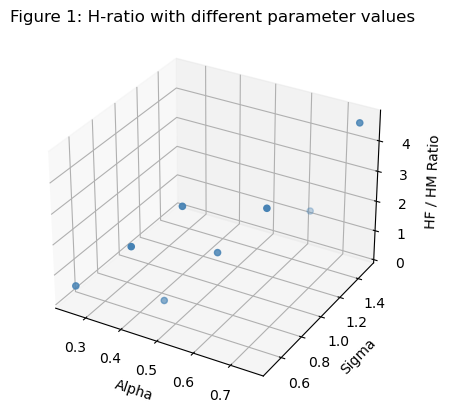

In [81]:
# Defining the model: inaugmodel
inaugmodel = HouseholdSpecializationModelClass()

# Defining the above given values for alpha and sigma
alpha = [0.25, 0.5, 0.75]
sigma = [0.5, 1, 1.5]

# Initialize lists to store the values of alpha, sigma, and the HM/HF ratio
alpha_values = []
sigma_values = []
ratio_H_values = []

# Loop the values of alpha and sigma above
for a in range(3):
    for s in range(3):
        inaugmodel.par.alpha = alpha[a]
        inaugmodel.par.sigma = sigma[s]
        # Use discrete to calculate the ratio
        results = inaugmodel.solve_discrete()
        ratio_H = (1e-8 + results.HF / results.HM)
        # Store the values in the lists
        alpha_values.append(alpha[a])
        sigma_values.append(sigma[s])
        ratio_H_values.append(ratio_H)
        print(f'alpha = {alpha[a]:.2f}, sigma = {sigma[s]:.2f}, HF / HM ratio = {ratio_H:.2f}')

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = 'steelblue'
transparency = 1 - (np.array(ratio_H_values) - min(ratio_H_values)) / (max(ratio_H_values) - min(ratio_H_values))
ax.scatter(alpha_values, sigma_values, ratio_H_values, c=color, alpha=transparency)
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('HF / HM Ratio')
ax.set_title('Figure 1: H-ratio with different parameter values')
plt.show()


We can see from the results above that HF/HM ratio is equal whenever $\alpha=0.5$ no matter the value of $\sigma$. In other words, the productivity at home is equal between the two genders when $\alpha=0.5$.

However when $\alpha < \sigma$, the productivity at home is dominated by men. Oppositely, women are more productive at home when $\alpha = 0.75$.

# Question 2

**Plot $log(H_F / H_M)$ against $log(w_F / w_M)$ for $w_F \in {0.8, 0.9, 1.0, 1.1, 1.2}$.**

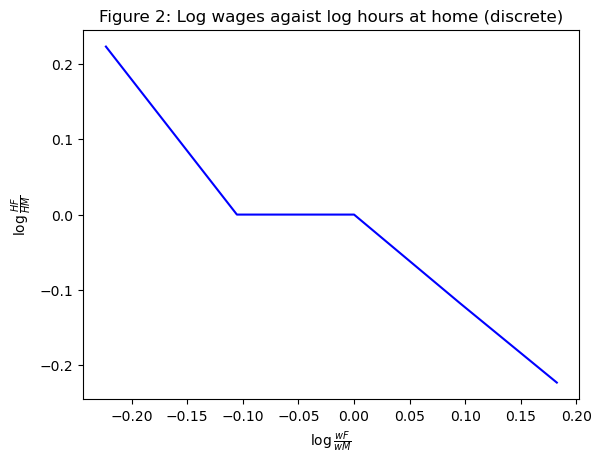

In [82]:
# Define new model: inaugmodel2
inaugmodel2 = HouseholdSpecializationModelClass()

# Define the initial alpha and sigma values
inaugmodel2.par.alpha = 0.5
inaugmodel2.par.sigma = 1

# Defining given values for wF and wM
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
wM = 1.0

# Make two empty lists for the loop
ratioH = []
ratioW = []

# Make a loop that creates a value of ratio_H and ratio_W and append them with each iteration
for wF in inaugmodel2.par.wF_vec:
    inaugmodel2.par.wF = wF
    results = inaugmodel2.solve_discrete()
    ratio_H = np.log(results.HF / results.HM)
    ratioH = np.append(ratioH, ratio_H)
    ratio_W = np.log(wF / inaugmodel2.par.wM)
    ratioW = np.append(ratioW, ratio_W)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ratioW, ratioH, 'b-')
ax.set_xlabel(r'$\log{\frac{wF}{wM}}$')
ax.set_ylabel(r'$\log{\frac{HF}{HM}}$')
ax.set_title('Figure 2: Log wages agaist log hours at home (discrete)')
plt.show()


From the figure 2 above, we can clearly see that there is inequality in the productivity at home whenever there is inequality in the wage ratios. This is no matter whether the wage inequality favors men or women. 

# Question 3

**Plot $log(H_F / H_M)$ against $log(w_F / w_M)$ for $w_F \in {0.8, 0.9, 1.0, 1.1, 1.2}$.**

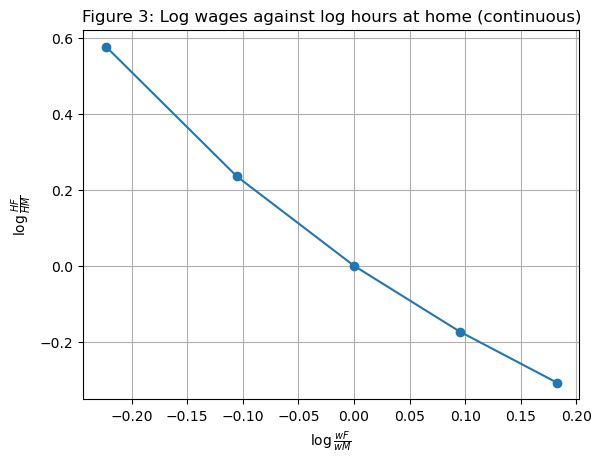

In [132]:
# Give values for the two vectors; wF and wM
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
wM = 1.0

# Set alpha and sigma values
alpha = 0.5
sigma = 1.0

# Creating lists
log_wF_wM = []
log_HF_HM = []

# Solving model for wF_vec and calculating the log values with different vector values
inaugmodel2.par.alpha = alpha
inaugmodel2.par.sigma = sigma
inaugmodel2.solve_wF_vec()
for i, wF in enumerate(inaugmodel2.par.wF_vec):
    inaugmodel2.par.wF = wF
    inaugmodel2.par.wM = wM
    HF_HM = inaugmodel2.sol.HF_vec[i] / inaugmodel2.sol.HM_vec[i]
    log_wF_wM.append(np.log(wF / wM))
    log_HF_HM.append(np.log(HF_HM))

# Plotting the data
plt.plot(log_wF_wM, log_HF_HM, marker='o')
plt.xlabel(r'$\log{\frac{wF}{wM}}$')
plt.ylabel(r'$\log{\frac{HF}{HM}}$')
plt.title('Figure 3: Log wages against log hours at home (continuous)')
plt.grid(True)
plt.show()


Figure 3 above displays a negative correlation between the relative wages of men and women in the job market and the amount of time they spend on household duties. However, this relationship follows a smooth linear curve rather than a distinct pattern. It is evident that women tend to engage in more employment when wages are high and reduce their work hours when wages are low, as indicated by the graph. If the female's wage surpasses that of the male, the couple tends to allocate all of her working hours to the job market.

# Question 4

**Choose $\alpha$ and $\sigma$ such it minimizes. Illustrate how the model fit the data and discuss the economic interpretation of the results.**

In [162]:
# Setting values
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
wM = 1.0

# Setting bounds and initial guess for the parameters
bounds = [(0, 0.99), (0.00, 2)]
initial_guess = [0.5, 1.0]

# Defining the function
def objective_function(x):
    inaugmodel2.par.alpha, inaugmodel2.par.sigma = x
    inaugmodel2.solve_wF_vec()
    inaugmodel2.run_regression()
    return sum([(inaugmodel2.par.beta0_target - inaugmodel2.sol.beta0)**2, (inaugmodel2.par.beta1_target - inaugmodel2.sol.beta1)**2])

NM_result = optimize.minimize(objective_function, initial_guess, method='Nelder-Mead', bounds=bounds, tol=1e-8)

print(NM_result)


 final_simplex: (array([[0.5       , 1.        ],
       [0.5       , 1.        ],
       [0.5       , 1.00000001]]), array([0., 0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 24
        status: 0
       success: True
             x: array([0.5, 1. ])


Given the squared errors of $\hat{\beta_0}=0.4$ and $\hat{\beta_1}=-0.1$, we get that optimal values are $\alpha=0.5$ and $\sigma=1.0$. These results are equal to the initial guess why we are in doubt of validity of the result.

# Question 5

**Suggest and implement an extension of the model, and analyze whether or not it can help match the data when $\alpha=0.5$.**

# Conclusion

Lala